linear regression: y = mx+c = a+bx

simple linear regression: y=a+bx

polynomial linear regression: y=a+bx+cx2+...

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
df = pd.read_excel(r"E:\DataBlaze\Data Science Resources\machine learning\ml\linear_regression\1.xlsx")  

df


,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16000,16400
6,01.07.23,15900,15800
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16200,16200


Text(0.5, 1.0, 'Stock Price Relationshp')

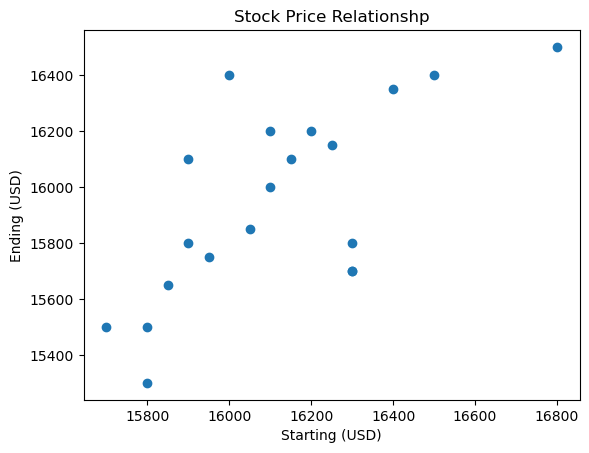

In [22]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price Relationshp')

Linear regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
reg=LinearRegression()

In [25]:
y=df[['Ending (USD)']]

In [26]:
y.mean()

Ending (USD)    15947.5
dtype: float64

In [27]:
x=df[['Starting (USD)']]

In [28]:
x.mean()

Starting (USD)    16117.5
dtype: float64

Text(0.5, 1.0, 'Stock Price Relationshp')

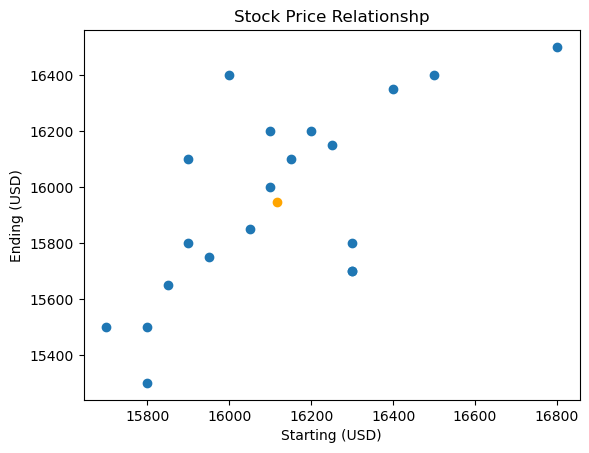

In [29]:
plt.scatter(x.mean(),y.mean(),color='orange')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price Relationshp')

In [30]:
reg.fit(x,y) #train the ml model

LinearRegression()

In [31]:
m = reg.coef_
m

array([[0.8485468]])

In [32]:
c = reg.intercept_
c

array([2271.04701804])

In [33]:
#y=mx+c

m*16700+c

array([[16441.77850858]])

In [34]:
reg.predict([[16522.4899938]])

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16291.15296159]])

In [35]:
df['predicted_y']= reg.predict(x)
df.head()

,Date,Starting (USD),Ending (USD),predicted_y
0,01.01.24,16800,16500,16526.633188
1,01.12.23,15900,16100,15762.941072
2,01.11.23,15800,15300,15678.086392
3,01.10.23,16100,16200,15932.650431
4,01.09.23,16300,15700,16102.359790


Text(0.5, 1.0, 'Stock Price Relationshp')

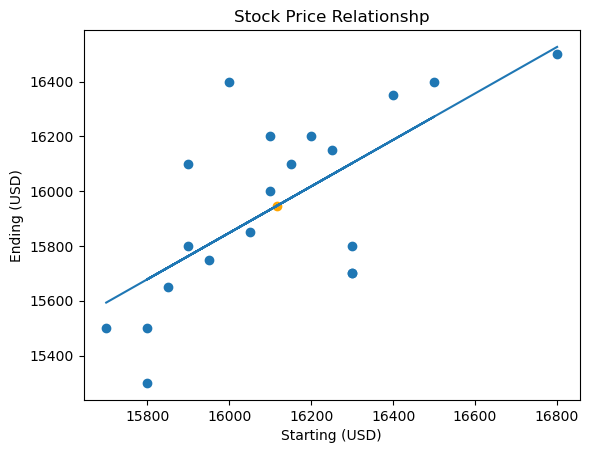

In [36]:
#plt.plot(x,df['predicted_y'])

plt.plot(x,reg.predict(x))

plt.scatter(x.mean(),y.mean(),color='orange')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price Relationshp')

In [37]:
df['lose']=df['Ending (USD)']-df['predicted_y']
df.head()

,Date,Starting (USD),Ending (USD),predicted_y,lose
0,01.01.24,16800,16500,16526.633188,-26.633188
1,01.12.23,15900,16100,15762.941072,337.058928
2,01.11.23,15800,15300,15678.086392,-378.086392
3,01.10.23,16100,16200,15932.650431,267.349569
4,01.09.23,16300,15700,16102.359790,-402.359790


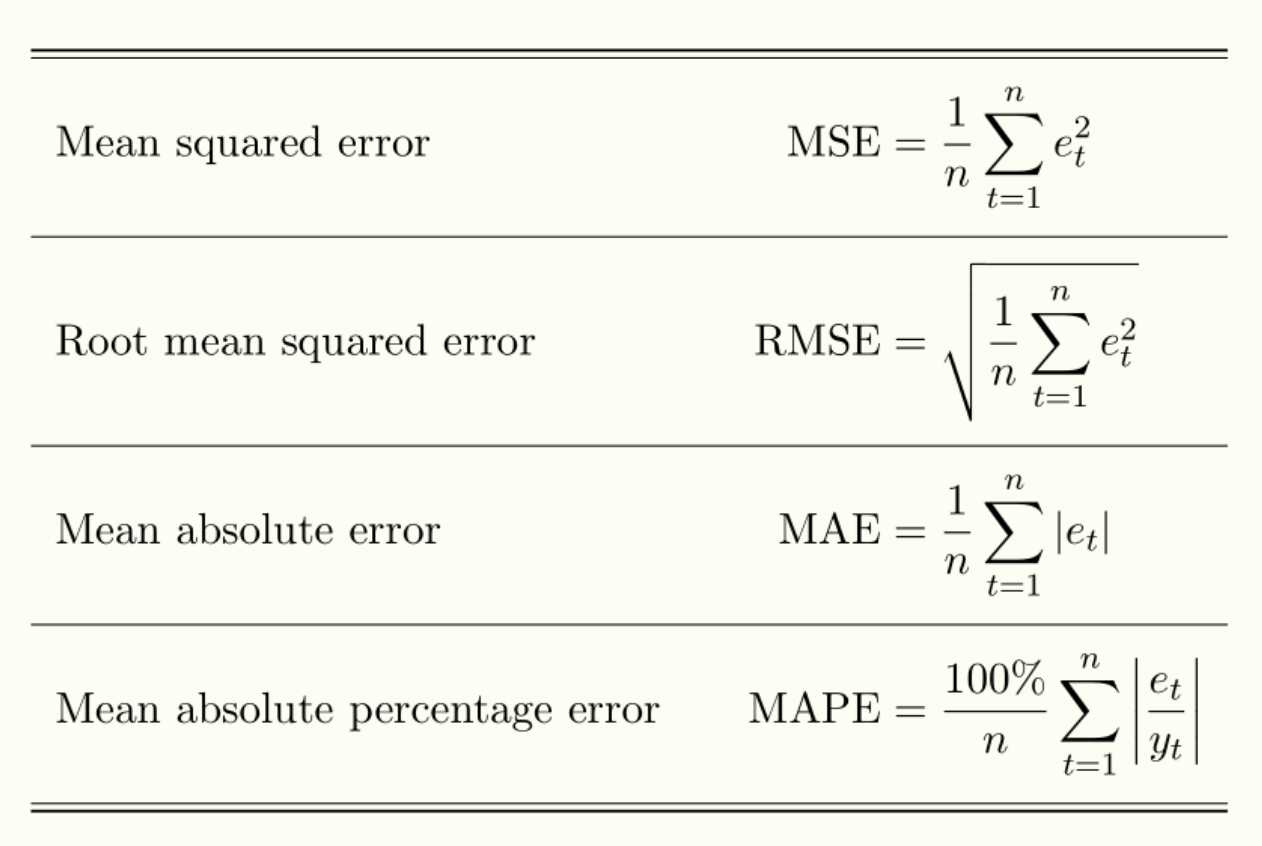

In [38]:
from IPython.display import display, Image
display(Image('mae,mse,rmse2.png'))

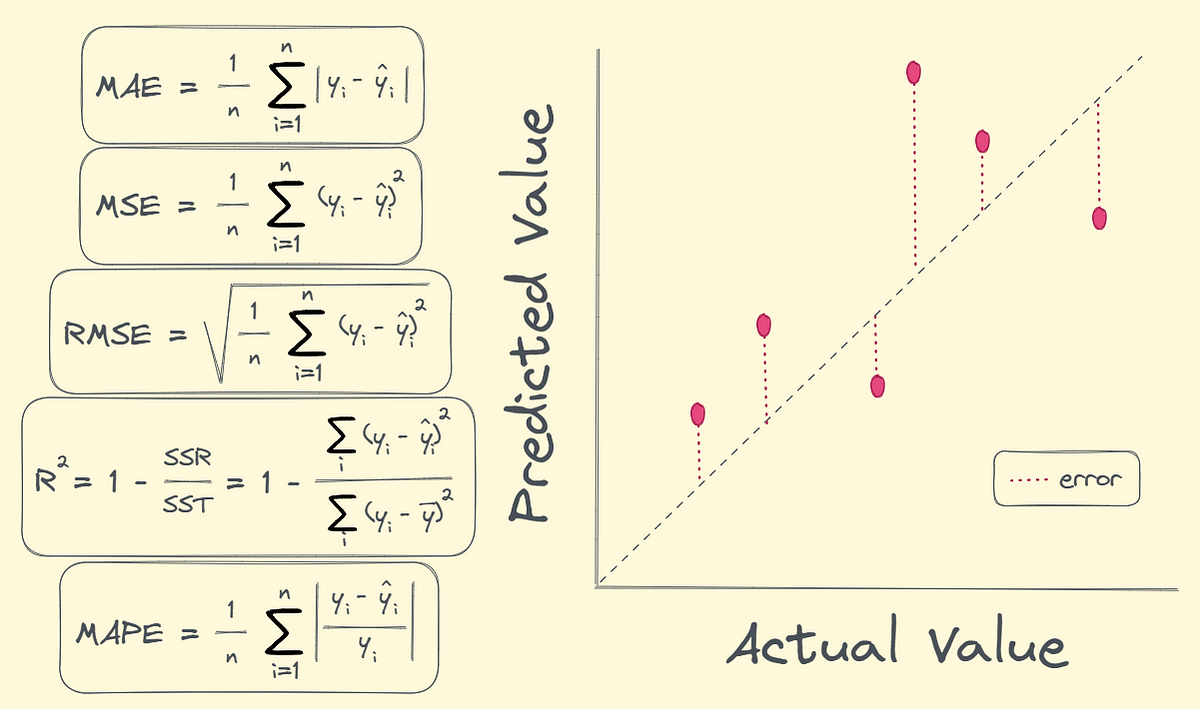

In [39]:
from IPython.display import display, Image
display(Image('mae,mse,rmse.png'))

mse

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [41]:
mse=mean_squared_error(df['Ending (USD)'],df['predicted_y'])
mse

60237.02337569995

In [42]:
mae=mean_absolute_error(df['Ending (USD)'],df['predicted_y'])
mae

194.92222913518808

In [43]:
sum(abs(df['lose']))/len(x) #manual calculation of mae

194.92222913518808

In [44]:
reg.score(x,y)

0.45668167652562197

Text(0.5, 1.0, 'Stock Price Relationshp')

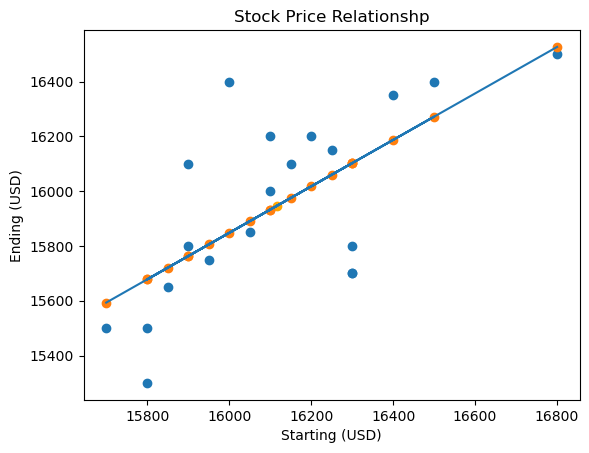

In [45]:
#plt.plot(x,df['predicted_y'])

plt.plot(x,reg.predict(x))

plt.scatter(x.mean(),y.mean(),color='orange')
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.scatter(df['Starting (USD)'],reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Price Relationshp')

In [46]:
from sklearn.metrics import r2_score
r2_score(y,reg.predict(x))

0.45668167652562197

In [47]:
reg.score(x,y) #r2 score by manual calculation

0.45668167652562197

Overfitting and Underfitting Concepts- no need just show

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100)  # True relationship is y = 2X + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate bias and variance using the bias_variance_decomp function
mse, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse')

# Print the results
print("MSE (Mean Squared Error):", mse)
print("Bias^2:", bias)
print("Variance:", variance)

MSE (Mean Squared Error): 0.938697205664219
Bias^2: 0.9178861112478705
Variance: 0.02081109441634832


MSE (Mean Squared Error): 0.9383544939341258
Bias^2: 0.9177899810232155
Variance: 0.020564512910910805
Training MSE: 1.0364249355794146
Test MSE: 0.9289849260911863


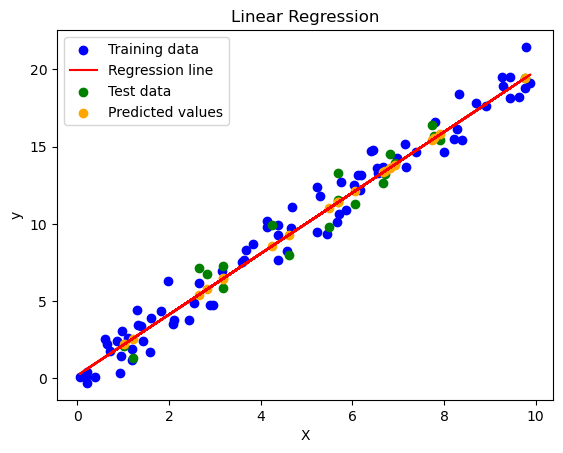

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + np.random.randn(100)  # True relationship is y = 2X + noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate bias and variance using the bias_variance_decomp function
mse, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse')

# Print the results
print("MSE (Mean Squared Error):", mse)
print("Bias^2:", bias)
print("Variance:", variance)

# Calculate MSE for training and test sets
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))

print("Training MSE:", train_mse)
print("Test MSE:", test_mse)

# Plot the training data and the regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')

# Plot the test data and the predicted values
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, model.predict(X_test), color='orange', label='Predicted values')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

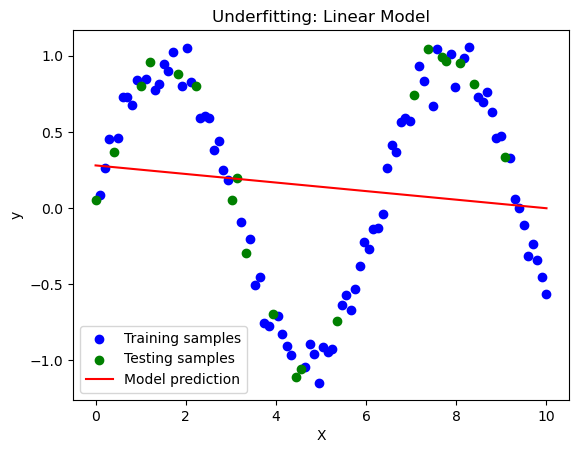

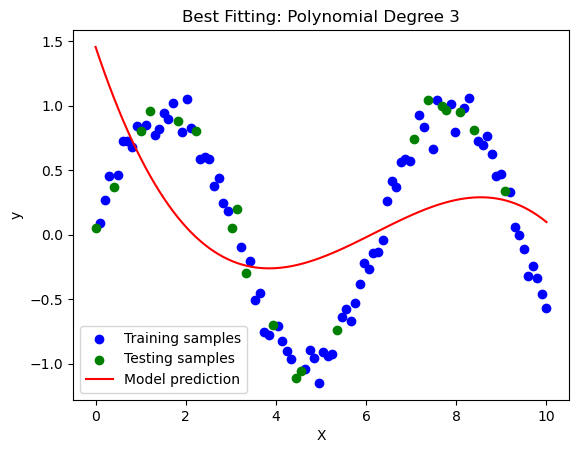

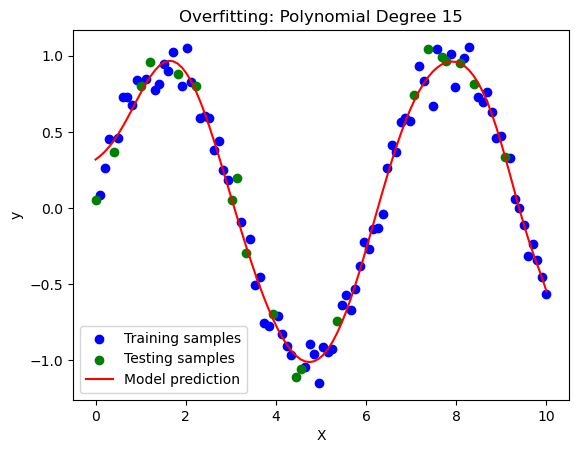

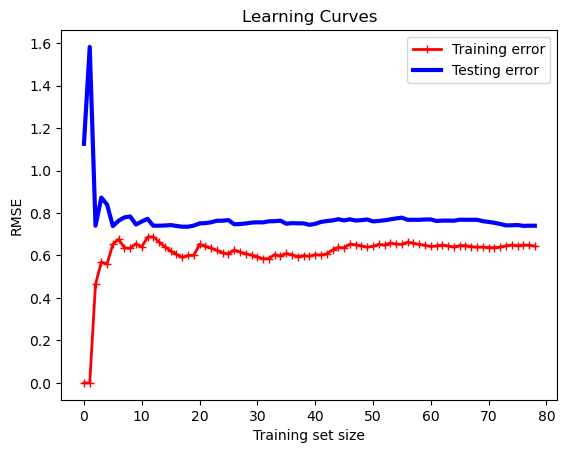

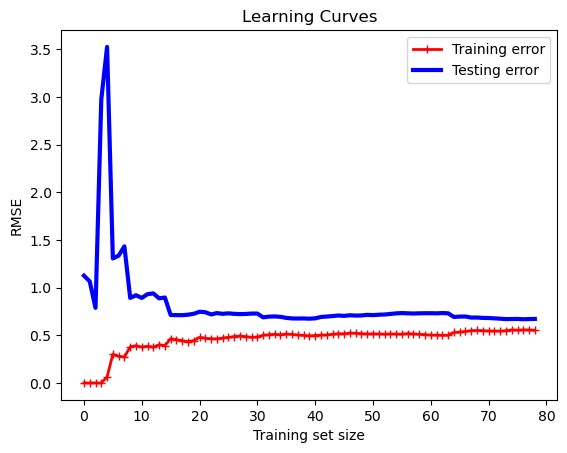

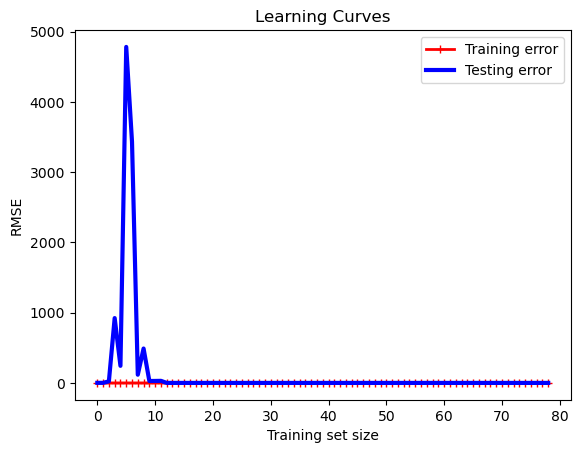

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.1, 100)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the results
def plot_results(X_train, y_train, X_test, y_test, model, title):
    plt.scatter(X_train, y_train, color='blue', label='Training samples')
    plt.scatter(X_test, y_test, color='green', label='Testing samples')
    X_plot = np.linspace(0, 10, 100)
    y_plot = model.predict(X_plot[:, np.newaxis])
    plt.plot(X_plot, y_plot, color='red', label='Model prediction')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Underfitting: Linear model
linear_model = LinearRegression()
linear_model.fit(X_train[:, np.newaxis], y_train)
plot_results(X_train, y_train, X_test, y_test, linear_model, 'Underfitting: Linear Model')

# Best fitting: Polynomial model with degree 3
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X_train[:, np.newaxis], y_train)
plot_results(X_train, y_train, X_test, y_test, poly_model, 'Best Fitting: Polynomial Degree 3')

# Overfitting: Polynomial model with degree 15
overfit_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
overfit_model.fit(X_train[:, np.newaxis], y_train)
plot_results(X_train, y_train, X_test, y_test, overfit_model, 'Overfitting: Polynomial Degree 15')

# Learning curves
def plot_learning_curve(model, X, y):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m, np.newaxis], y_train[:m])
        y_train_predict = model.predict(X_train[:m, np.newaxis])
        y_test_predict = model.predict(X_test[:, np.newaxis])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training error")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Testing error")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title("Learning Curves")

plot_learning_curve(linear_model, X_train, y_train)
plt.show()
plot_learning_curve(poly_model, X_train, y_train)
plt.show()
plot_learning_curve(overfit_model, X_train, y_train)
plt.show()

**<h1>Pearson corelation coefficient</h1>**

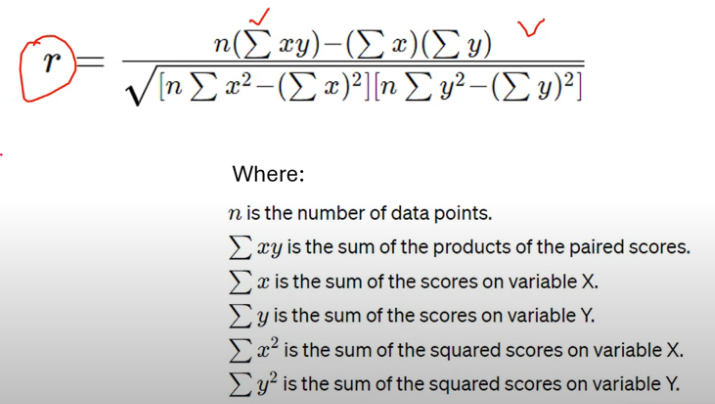

In [51]:
from IPython.display import display, Image
display(Image('co.png'))

In [52]:
data={
    'x':[1,2,3,4,5,7,10],
    'y':[2,3,5,4,6,6,8]
}

In [53]:
data

{'x': [1, 2, 3, 4, 5, 7, 10], 'y': [2, 3, 5, 4, 6, 6, 8]}

In [54]:
df=pd.DataFrame(data)
df

,x,y
0,1,2
1,2,3
2,3,5
3,4,4
4,5,6
5,7,6
6,10,8


pearson corelation coefficient

In [55]:
p_cc=df['x'].corr(df['y'])
p_cc

0.9391480052471199

In [56]:
df.corr()

,x,y
x,1.000000,0.939148
y,0.939148,1.000000


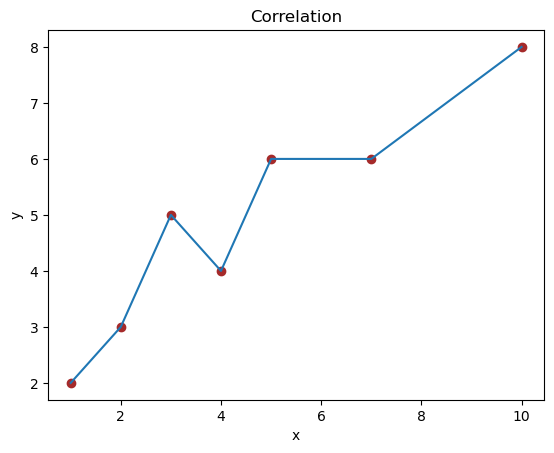

In [57]:
import matplotlib.pyplot as plt
plt.scatter(df['x'],df['y'],color='brown')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Correlation')
plt.plot(df['x'],df['y'])